In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

from sklearn.ensemble import VotingClassifier

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

In [15]:
df = pd.read_csv('/content/drive/MyDrive/telco_customer.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Customer_ID,Tenure_Months,Location,Device_Class,Games_Product,Music_Product,Education_Product,Call_Center,Video_Product,Use_MyApp,Payment_Method,Monthly_Purchase_Th_IDR,Churn_Label,Longitude,Latitude,CLTV_Th_IDR_Pred
0,0,0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


In [16]:
def encode_data(dataframe):
    if dataframe.dtype == "object":
        dataframe = LabelEncoder().fit_transform(dataframe)
    return dataframe

df = data.apply(lambda x: encode_data(x))
df.head()

,Unnamed: 0,Customer_ID,Tenure_Months,Location,Device_Class,Games_Product,Music_Product,Education_Product,Call_Center,Video_Product,Use_MyApp,Payment_Method,Monthly_Purchase_Th_IDR,Churn_Label,Longitude,Latitude,CLTV_Th_IDR_Pred
0,0,0,2,1,2,2,2,0,0,0,0,2,70.005,1,106.816666,-6.2,4210.7
1,1,1,2,1,0,0,0,0,0,0,0,3,91.910,1,106.816666,-6.2,3511.3
2,2,2,8,1,0,0,0,2,0,2,2,3,129.545,1,106.816666,-6.2,6983.6
3,3,3,28,1,0,0,0,2,1,2,2,3,136.240,1,106.816666,-6.2,6503.9
4,4,4,49,1,0,0,2,2,0,2,2,1,134.810,1,106.816666,-6.2,6942.0


In [17]:
X = data.drop(columns = ["Churn_Label", 'Unnamed: 0', 'Customer_ID', 'Longitude', 'Latitude'])
y = data["Churn_Label"].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4, stratify =y)

In [19]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

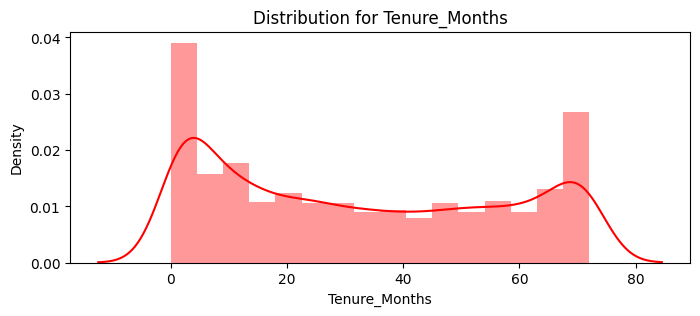

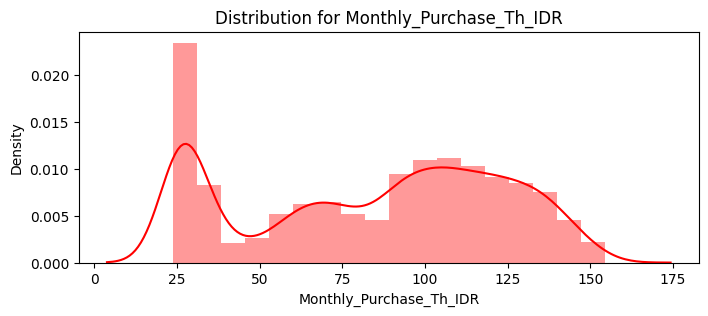

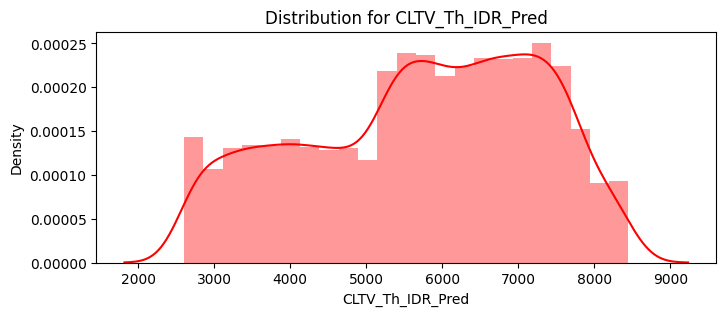

In [20]:
col =  ["Tenure_Months", 'Monthly_Purchase_Th_IDR', 'CLTV_Th_IDR_Pred']
for features in col :distplot(features, df)

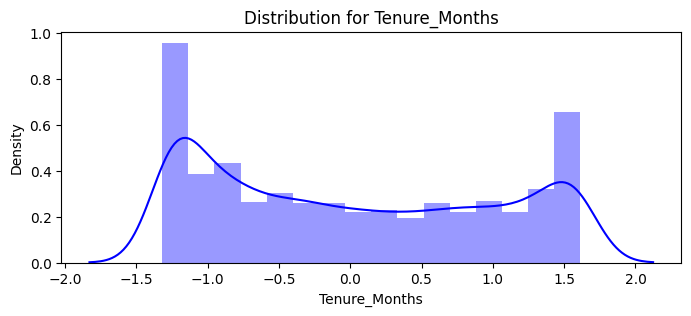

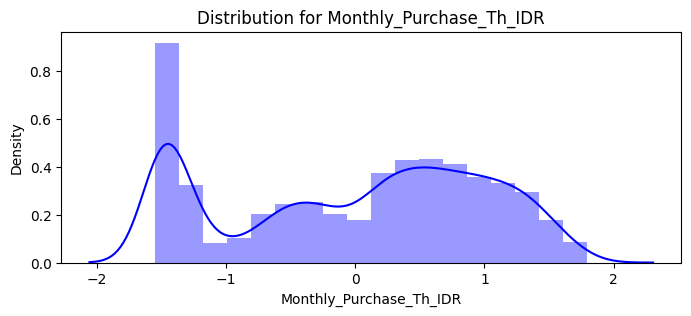

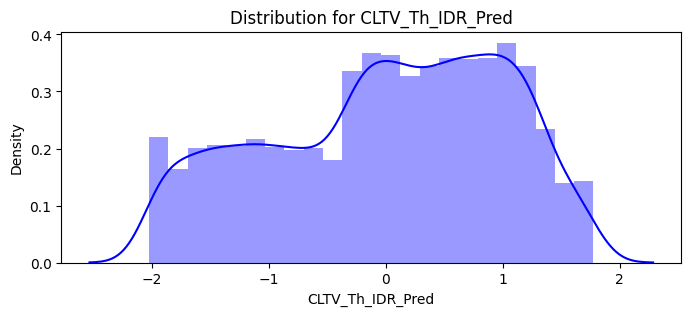

In [22]:
data_std = pd.DataFrame(StandardScaler().fit_transform(df[col]).astype('float64'), columns = col)
for feat in col: distplot(feat, data_std, color='b')

In [24]:
df.columns

Index(['Unnamed: 0', 'Customer_ID', 'Tenure_Months', 'Location',
       'Device_Class', 'Games_Product', 'Music_Product', 'Education_Product',
       'Call_Center', 'Video_Product', 'Use_MyApp', 'Payment_Method',
       'Monthly_Purchase_Th_IDR', 'Churn_Label', 'Longitude', 'Latitude',
       'CLTV_Th_IDR_Pred'],
      dtype='object')

In [26]:
for i in df.columns:
    print(i, ": ", df[i].unique())

Unnamed: 0 :  [   0    1    2 ... 7040 7041 7042]
Customer_ID :  [   0    1    2 ... 7040 7041 7042]
Tenure_Months :  [ 2  8 28 49 10  1 47 17  5 34 11 15 18  9  7 12 25 68 55 37  3 27 20  4
 58 53 13  6 19 59 16 52 24 32 38 54 43 63 21 69 22 61 60 48 40 23 39 35
 56 65 33 30 45 46 62 70 50 44 71 26 14 41 66 64 29 42 67 51 31 57 36 72
  0]
Location :  [1 0]
Device_Class :  [2 0 1]
Games_Product :  [2 0 1]
Music_Product :  [2 0 1]
Education_Product :  [0 2 1]
Call_Center :  [0 1]
Video_Product :  [0 2 1]
Use_MyApp :  [0 2 1]
Payment_Method :  [2 3 1 0]
Monthly_Purchase_Th_IDR :  [ 70.005  91.91  129.545 ... 140.855  82.03  102.31 ]
Churn_Label :  [1 0]
Longitude :  [106.816666 107.60981 ]
Latitude :  [-6.2      -6.914744]
CLTV_Th_IDR_Pred :  [4210.7 3511.3 6983.6 ... 3601.  6038.5 7218.9]


In [27]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['Payment_Method', 'Device_Class', 'Location'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(col) - set(cat_cols_ohe)) #those that need label encoding

print(cat_cols_le)

['Video_Product', 'Call_Center', 'Education_Product', 'Music_Product', 'Use_MyApp', 'Games_Product']


In [28]:
scaler = StandardScaler()
X_train[col] = StandardScaler().fit_transform(X_train[col])
X_test[col] = StandardScaler().fit_transform(X_test[col])

In [29]:
models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0, class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))
models.append(("Adaboost", AdaBoostClassifier()))
models.append(("Gradient boost classifier", GradientBoostingClassifier()))
models.append(("Voting Classifier",  VotingClassifier(estimators=[('gbc', GradientBoostingClassifier()), ('lr', LogisticRegression()), ('abc',  AdaBoostClassifier())], voting='soft')))

# Supervised Learning: Classification Model
Predict Customer Churn

##Model Evaluating

In [31]:
acc_results =[]
auc_results =[]
names = []

result_col = ["Algorithm", "ROC AUC Mean", "ROC AUC STD", "Accuracy Mean", "Accuracy STD"]
model_results = pd.DataFrame(columns = result_col)

i=0
# K- fold cross validation

for name, model in models:
    names.append(name)
    kfold = model_selection.KFold(n_splits=10)

    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train,
                    cv = kfold, scoring="accuracy")
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train,
                    cv = kfold, scoring="roc_auc")
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)

    model_results.loc[i] = [name,
                           round(cv_auc_results.mean()*100,2),
                           round(cv_auc_results.std()*100,2),
                           round(cv_acc_results.mean()*100,2),
                           round(cv_acc_results.std()*100,2)]
    i+=1

model_results.sort_values(by = ['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
9,Voting Classifier,83.55,1.72,79.72,1.70
8,Gradient boost classifier,83.49,1.82,78.82,1.34
7,Adaboost,83.35,2.03,79.35,1.39
0,Logistic Regression,82.82,1.44,74.60,1.23
1,SVC,82.67,1.41,79.03,1.49
6,Random Forest,81.14,1.57,77.89,1.36
4,Gaussian NB,81.07,1.82,77.75,1.76
2,Kernel SVM,79.40,1.60,78.74,1.66
3,KNN,76.34,2.00,76.39,1.30
5,Decision Tree Classifier,64.03,2.00,71.83,1.23


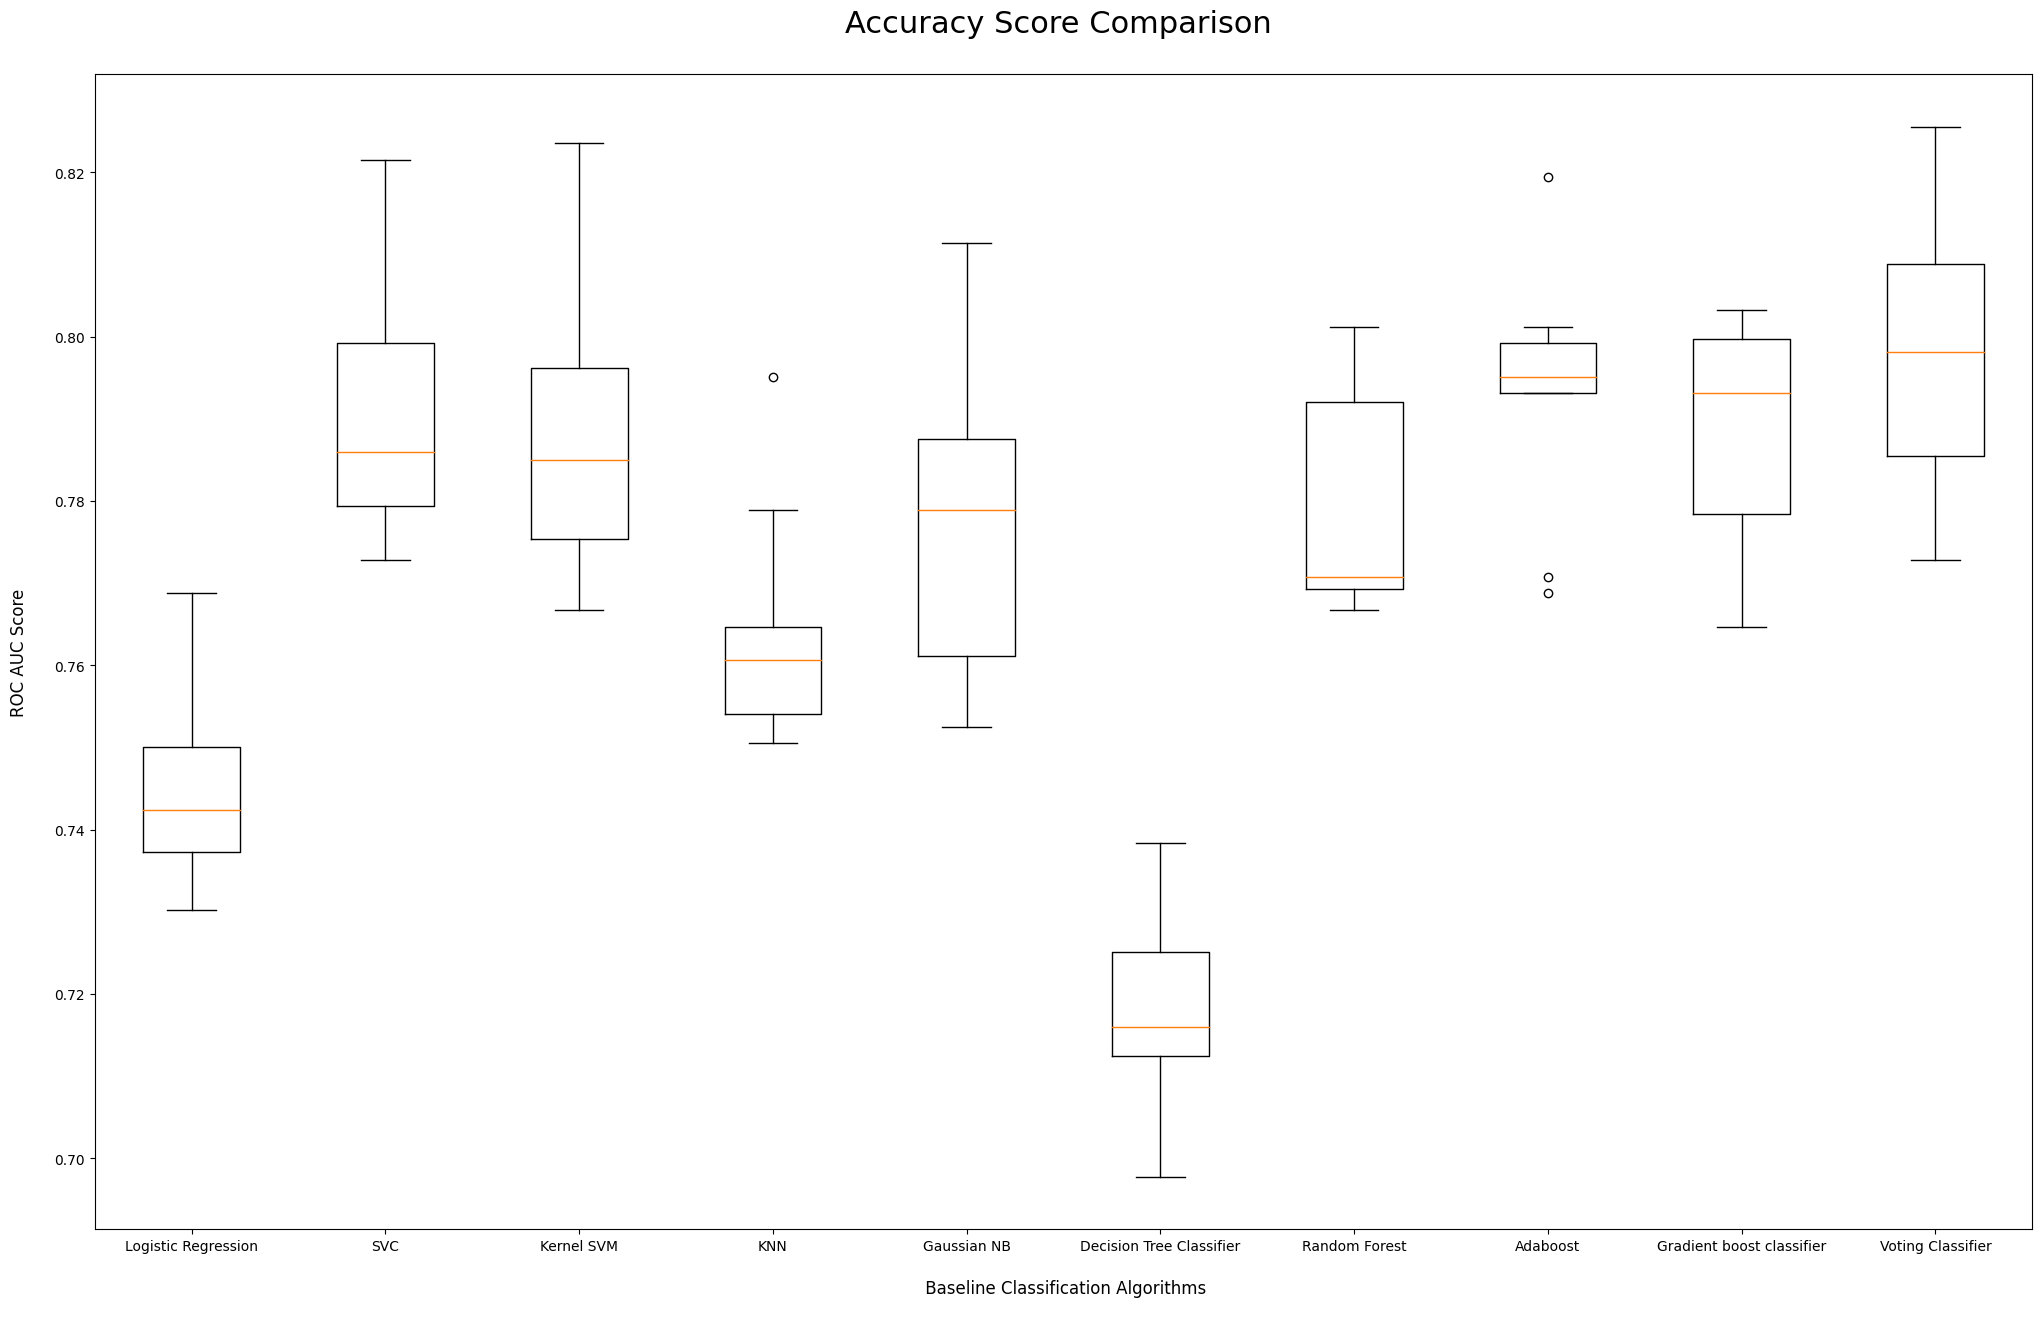

In [32]:
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)

plt.ylabel('ROC AUC Score\n',
horizontalalignment="center",fontstyle = "normal",
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Baseline Classification Algorithms\n',
horizontalalignment="center",fontstyle = "normal",
fontsize = "large", fontfamily = "sans-serif")

plt.title('Accuracy Score Comparison \n',
horizontalalignment="center", fontstyle = "normal",
fontsize = "22", fontfamily = "sans-serif")

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

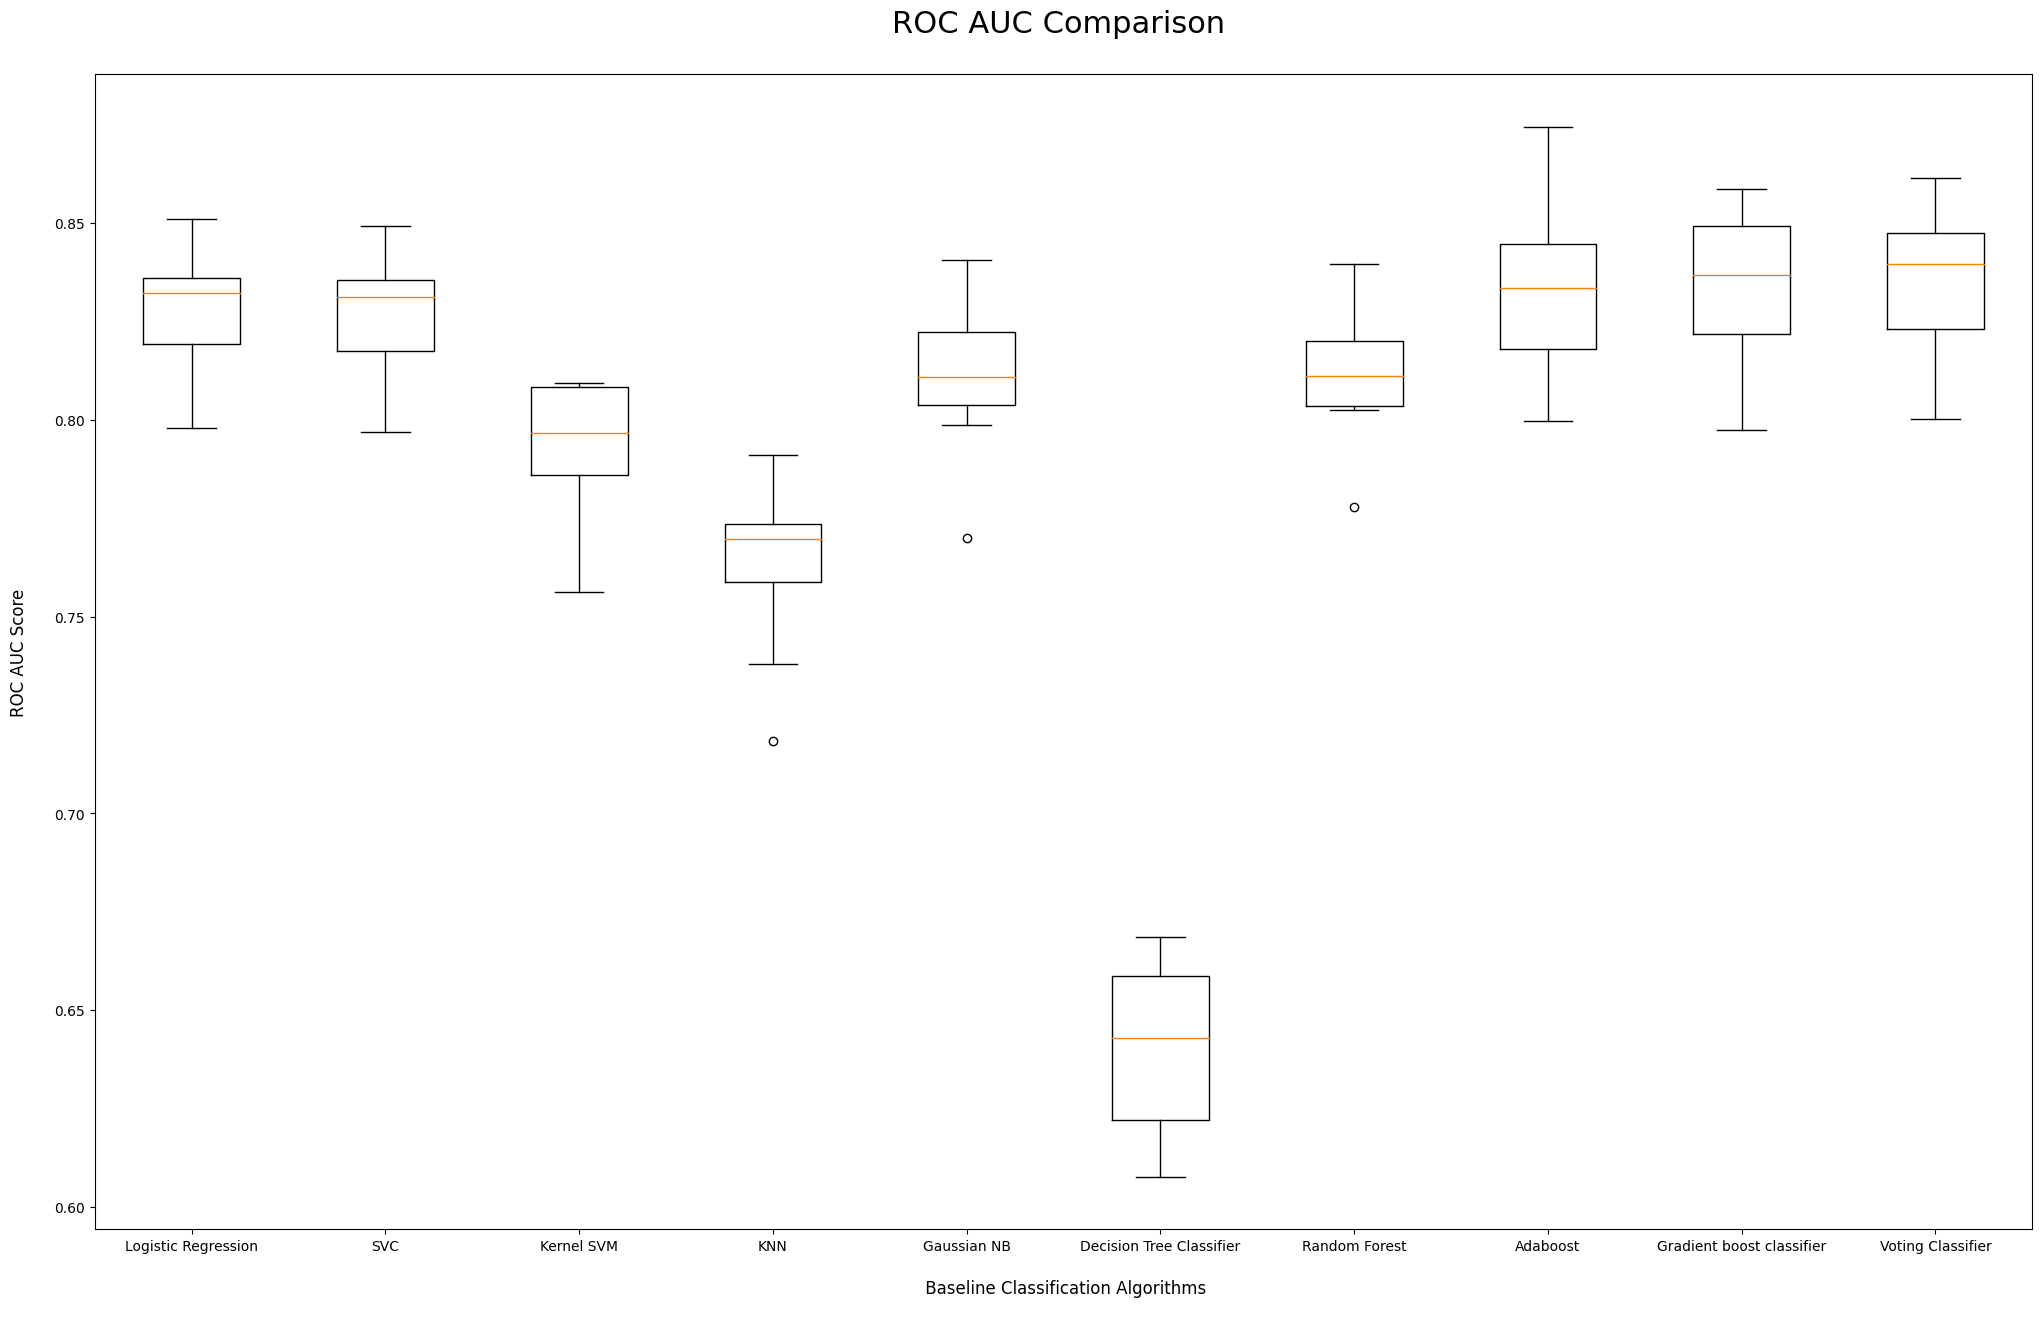

In [33]:
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)

plt.ylabel('ROC AUC Score\n',
horizontalalignment="center",fontstyle = "normal",
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Baseline Classification Algorithms\n',
horizontalalignment="center",fontstyle = "normal",
fontsize = "large", fontfamily = "sans-serif")

plt.title('ROC AUC Comparison \n',
horizontalalignment="center", fontstyle = "normal",
fontsize = "22", fontfamily = "sans-serif")

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()


In [34]:
score_array = []

for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each)
    knn_loop.fit(X_train,y_train)
    score_array.append(knn_loop.score(X_test,y_test))

score_array

[0.7160435399905348,
 0.7439659252247989,
 0.7562707051585423,
 0.7572172266919073,
 0.759110269758637,
 0.7643161381921438,
 0.7690487458589683,
 0.7728348319924279,
 0.7704685281590156,
 0.7733080927591103,
 0.7728348319924279,
 0.77520113582584,
 0.7756743965925225,
 0.7785139611926172,
 0.7756743965925225,
 0.7813535257927118,
 0.7827733080927591,
 0.7808802650260294,
 0.779460482725982,
 0.7846663511594889,
 0.783719829626124,
 0.7875059157595835,
 0.7813535257927118,
 0.7832465688594415]

##K-Nearest Neighbors

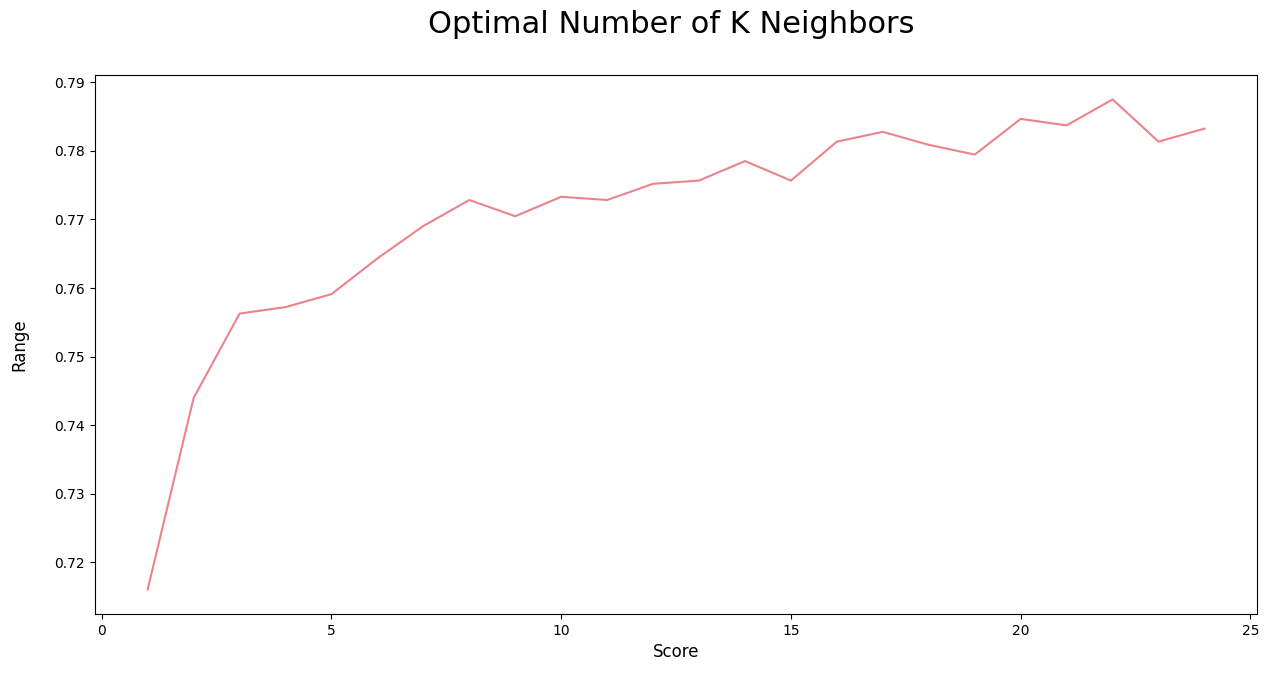

In [35]:
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,25),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

plt.title('Optimal Number of K Neighbors \n',horizontalalignment="center", fontstyle = "normal",fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

## Random Forest

In [36]:
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1)
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))

In [37]:
for i,j in enumerate(score_array):
    print(i+1,":",j)

1 : 0.705631803123521
2 : 0.7524846190250828
3 : 0.7539044013251301
4 : 0.7543776620918126
5 : 0.7572172266919073
6 : 0.7643161381921438
7 : 0.7662091812588736
8 : 0.7728348319924279
9 : 0.7638428774254614
10 : 0.77520113582584
11 : 0.7685754850922859
12 : 0.7780407004259347
13 : 0.767628963558921
14 : 0.7780407004259347
15 : 0.7785139611926172
16 : 0.7818267865593942
17 : 0.7799337434926644
18 : 0.7865593942262187
19 : 0.7775674396592522
20 : 0.7789872219592996
21 : 0.7813535257927118
22 : 0.780407004259347
23 : 0.7813535257927118
24 : 0.7832465688594415
25 : 0.7813535257927118
26 : 0.780407004259347
27 : 0.7775674396592522
28 : 0.7799337434926644
29 : 0.7775674396592522
30 : 0.7780407004259347
31 : 0.7766209181258874
32 : 0.7785139611926172
33 : 0.779460482725982
34 : 0.7775674396592522
35 : 0.7766209181258874
36 : 0.7766209181258874
37 : 0.7770941788925698
38 : 0.7756743965925225
39 : 0.7747278750591576
40 : 0.7766209181258874
41 : 0.7785139611926172
42 : 0.779460482725982
43 : 0.77

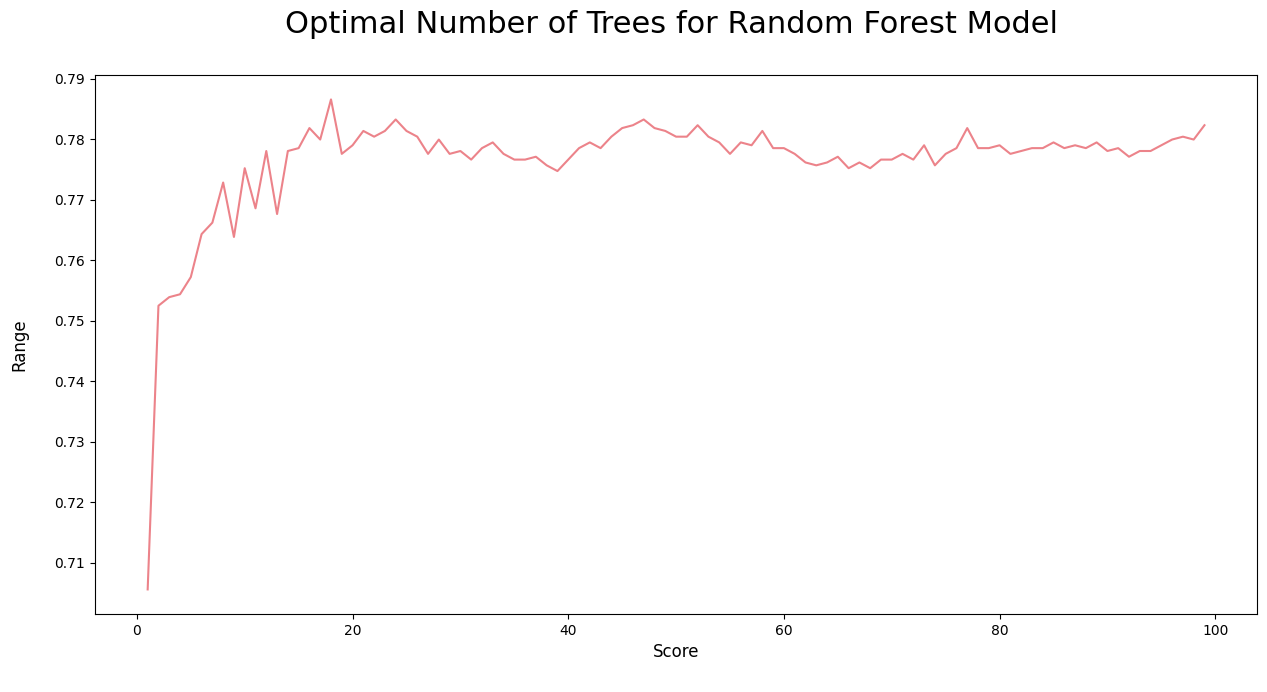

In [38]:
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

# Second Iteration

In [39]:
#evaluation of results
def model_evaluation(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta = 2.0)

    results = pd.DataFrame([[model_name, acc, prec, rec, f1, f2]],
                       columns = ["Model", "Accuracy", "Precision", "Recall",
                                 "F1 SCore", "F2 Score"])
    results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
    return results

In [40]:
# Logistic regression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

#SVC

classifier2 = SVC(kernel = 'linear', random_state = 0)
classifier2.fit(X_train, y_train)
y_pred2 = classifier2.predict(X_test)

#knn

classifier3 = KNeighborsClassifier(n_neighbors=22, metric="minkowski", p=2)
classifier3.fit(X_train, y_train)
y_pred3 = classifier3.predict(X_test)


#Kernel SVM
classifier4 = SVC(kernel="rbf", random_state =0)
classifier4.fit(X_train, y_train)
y_pred4 = classifier4.predict(X_test)


#Naive Bayes
classifier5 = GaussianNB()
classifier5.fit(X_train, y_train)
y_pred5 = classifier5.predict(X_test)

#Decision tree
classifier6 = DecisionTreeClassifier(criterion="entropy", random_state=0)
classifier6.fit(X_train, y_train)
y_pred6 = classifier6.predict(X_test)

#Random Forest

classifier7 = RandomForestClassifier(n_estimators=72, criterion="entropy", random_state=0)
classifier7.fit(X_train, y_train)
y_pred7 = classifier7.predict(X_test)

#Adaboost
classifier8 = AdaBoostClassifier()
classifier8.fit(X_train, y_train)
y_pred8 = classifier8.predict(X_test)

#Gradient Boost
classifier9 = GradientBoostingClassifier()


classifier9.fit(X_train, y_train)
y_pred9 = classifier9.predict(X_test)





#Voting Classifier

classifier10 = VotingClassifier(estimators=[('gbc', GradientBoostingClassifier()), ('lr', LogisticRegression()),
                                            ('abc', AdaBoostClassifier())], voting='soft')



classifier10.fit(X_train, y_train)
y_pred10 = classifier10.predict(X_test)

In [41]:
lr = model_evaluation(y_test, y_pred, "Logistic Regression")
svm = model_evaluation(y_test, y_pred2, "SVM (Linear)")
knn = model_evaluation(y_test, y_pred3, "K-Nearest Neighbours")
k_svm = model_evaluation(y_test, y_pred4, "Kernel SVM")
nb = model_evaluation(y_test, y_pred5, "Naive Bayes")
dt = model_evaluation(y_test, y_pred6, "Decision Tree")
rf = model_evaluation(y_test, y_pred7, "Random Forest")
ab = model_evaluation(y_test, y_pred8, "Adaboost")
gb = model_evaluation(y_test, y_pred9, "Gradient Boost")
vc = model_evaluation(y_test, y_pred10, "Voting Classifier")

In [42]:
eval_ =lr.append(svm).append(knn).append(k_svm).append(nb).append(dt).append(rf).append(ab).append(gb).append(vc).sort_values(["Precision",
"Recall", "F2 Score"], ascending = False).reset_index().drop(columns = "index")
eval_

,Model,Accuracy,Precision,Recall,F1 SCore,F2 Score
0,Kernel SVM,0.790819,0.674487,0.409982,0.509978,0.444874
1,Voting Classifier,0.797918,0.661058,0.490196,0.562948,0.516917
2,Adaboost,0.796498,0.648526,0.509804,0.570858,0.532588
3,Gradient Boost,0.796025,0.648402,0.506239,0.568569,0.529456
4,Logistic Regression,0.792712,0.648193,0.479501,0.551230,0.505829
5,K-Nearest Neighbours,0.787506,0.646597,0.440285,0.523860,0.470297
6,SVM (Linear),0.790819,0.644068,0.474153,0.546201,0.500565
7,Random Forest,0.775201,0.602381,0.450980,0.515800,0.474850
8,Naive Bayes,0.778041,0.576667,0.616756,0.596038,0.608298
9,Decision Tree,0.715570,0.465517,0.481283,0.473269,0.478045


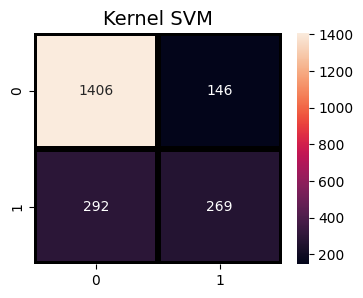

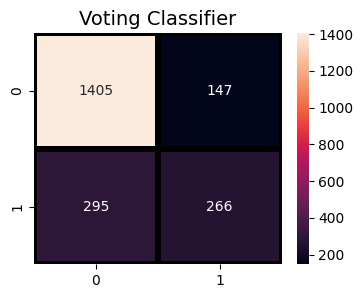

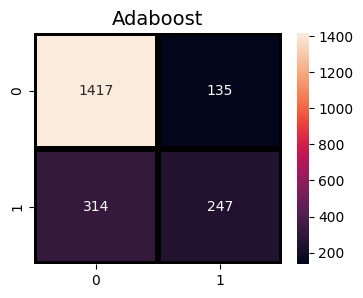

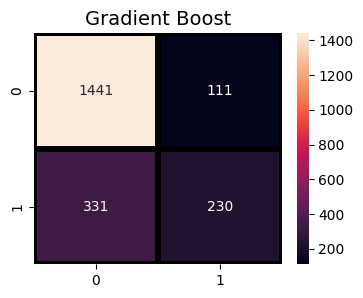

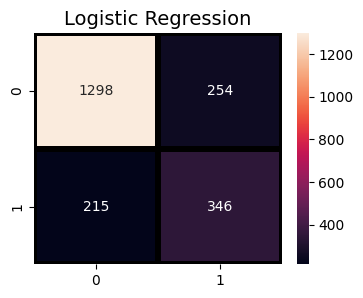

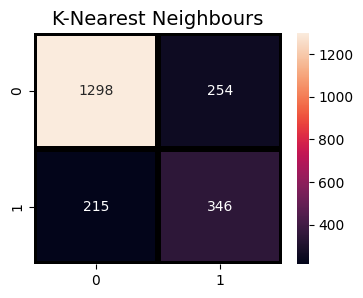

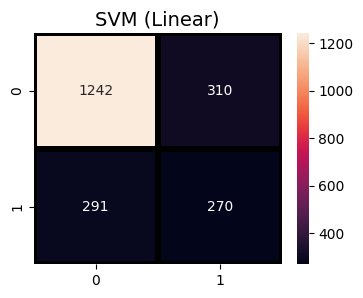

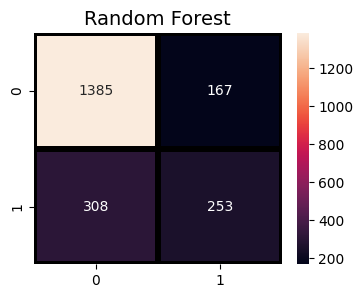

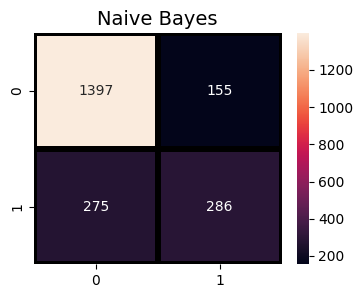

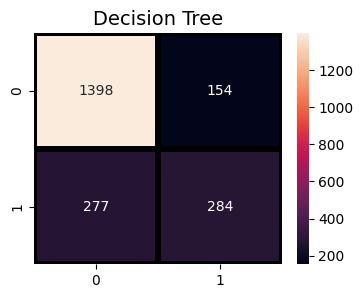

In [43]:
predictions = [y_pred, y_pred2 , y_pred3, y_pred4, y_pred5, y_pred5, y_pred6, y_pred7,
              y_pred8, y_pred9, y_pred10]

for i, j in zip(predictions, eval_.Model.values):
    plt.figure(figsize=(4,3))
    sns.heatmap(confusion_matrix(y_test, i),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

    plt.title(j,fontsize=14)
    plt.show()

<b>k-Fold Cross-Validation</b>: Model evaluation is most commonly done through ‘K- fold Cross-Validation’ technique that primarily helps us to fix the variance. Variance problem occurs when we get good accuracy while running the model on a training set and a test set but then the accuracy looks different when the model is run on another test set.
So, in order to fix the variance problem, k-fold cross-validation basically split the training set into 10 folds and train the model on 9 folds (9 subsets of the training dataset) before testing it on the test fold. This gives us the flexibility to train our model on all ten combinations of 9 folds; giving ample room to finalize the variance.

##Model Evaluation

In [44]:
def k_fold_cross_validation(classifier_name, name):
    accuracies = cross_val_score(estimator=classifier_name,
                            X=X_train, y=y_train, cv =10)
    print(name, "accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

In [45]:
k_fold_cross_validation(classifier8, "Adaboost")

Adaboost accuracy: 0.80 (+/- 0.03)


In [46]:
k_fold_cross_validation(classifier10, "Voting classifier")

Voting classifier accuracy: 0.80 (+/- 0.03)


In [47]:
k_fold_cross_validation(classifier9, "Gradient Boost classifier")

Gradient Boost classifier accuracy: 0.79 (+/- 0.02)


In [48]:
k_fold_cross_validation(classifier, "Logistic regression")

Logistic regression accuracy: 0.79 (+/- 0.02)


In [49]:
k_fold_cross_validation(classifier4, "Kernel SVM")

Kernel SVM accuracy: 0.79 (+/- 0.03)


In [50]:
# ROC Curve

def ROC_curve(classifier_, name, y_pred_):
    classifier_.fit(X_train, y_train)
    probs = classifier_.predict_proba(X_test)
    probs = probs[:, 1]
    classifier_roc_auc = roc_auc_score(y_test, probs )
    rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier_.predict_proba(X_test)[:,1])
    plt.figure(figsize=(14, 6))

    label_ = name + '(area = %0.2f)' % classifier_roc_auc
    # Plot Adaboost ROC
    plt.plot(rf_fpr, rf_tpr,
    label=label_)
    # Plot Base Rate ROC
    plt.plot([0,1], [0,1],label='Base Rate' 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.ylabel('True Positive Rate \n',horizontalalignment="center",
    fontstyle = "normal", fontsize = "medium",
    fontfamily = "sans-serif")

    plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
    fontstyle = "normal", fontsize = "medium",
    fontfamily = "sans-serif")

    plt.title('ROC Graph \n',horizontalalignment="center",
    fontstyle = "normal", fontsize = "22",
    fontfamily = "sans-serif")

    plt.legend(loc="lower right", fontsize = "medium")
    plt.xticks(rotation=0, horizontalalignment="center")
    plt.yticks(rotation=0, horizontalalignment="right")
    plt.show()

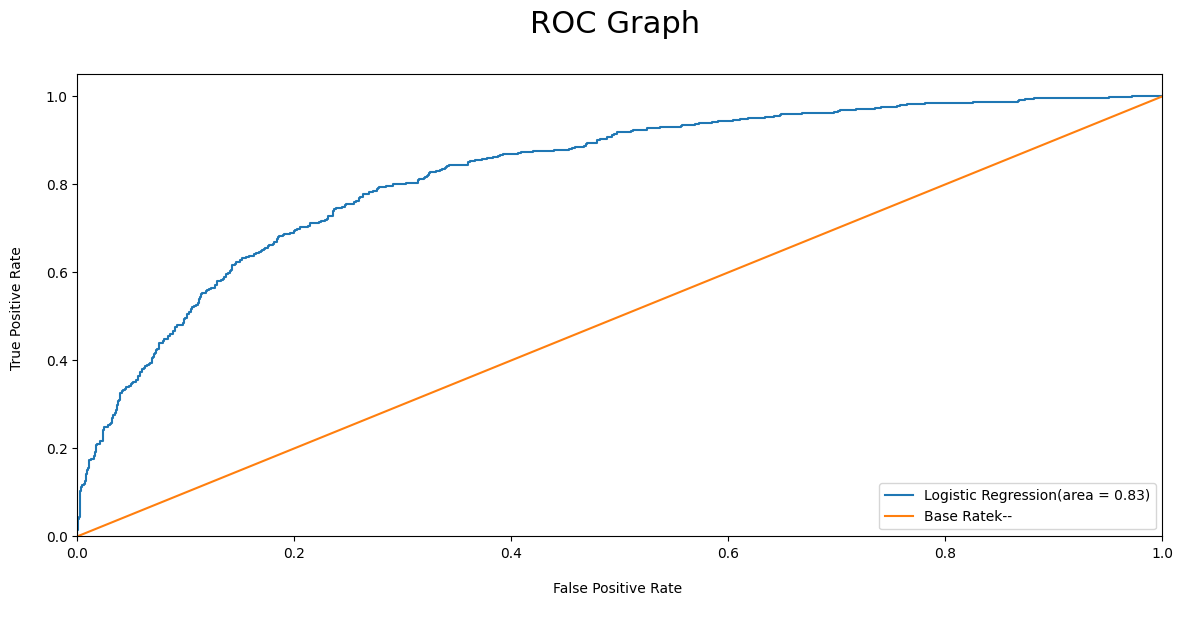

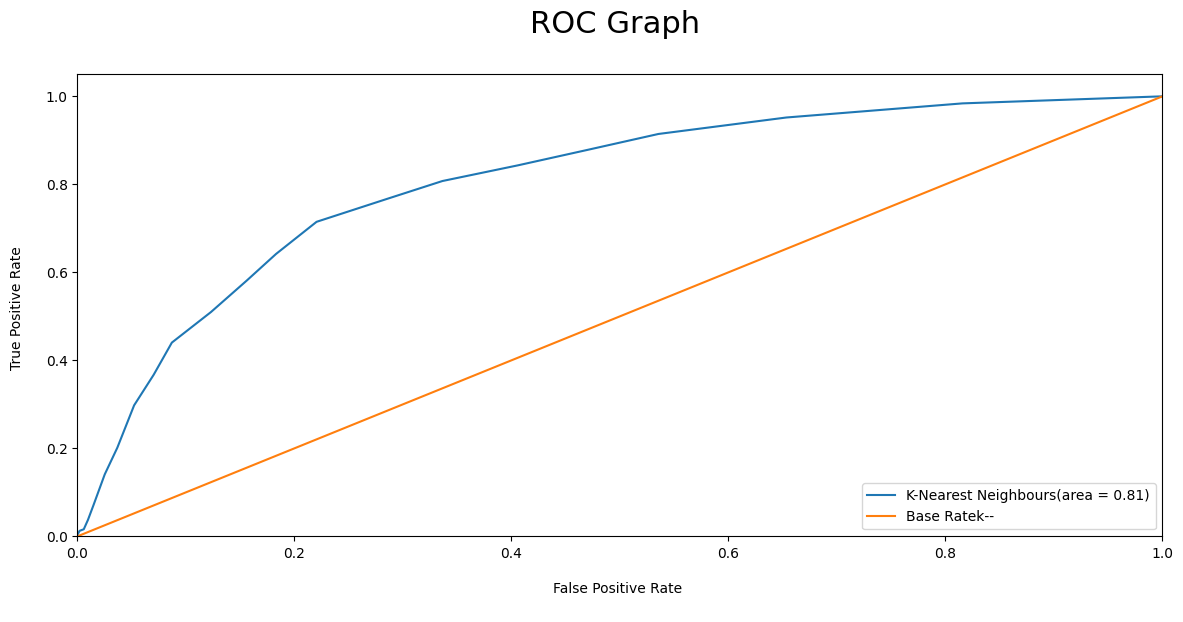

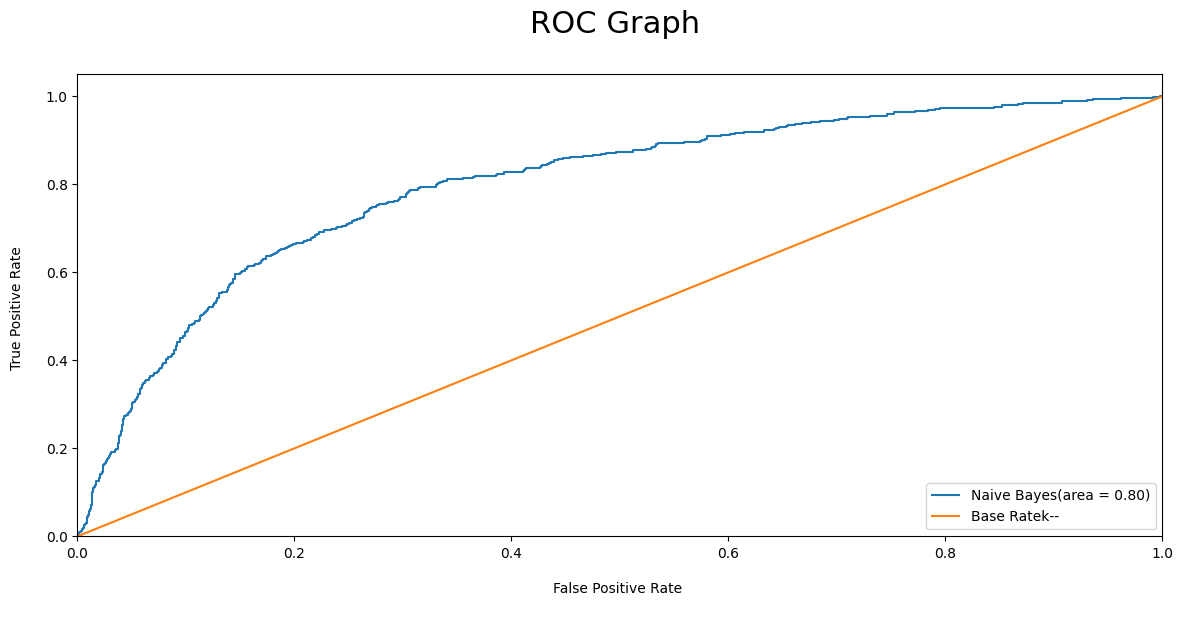

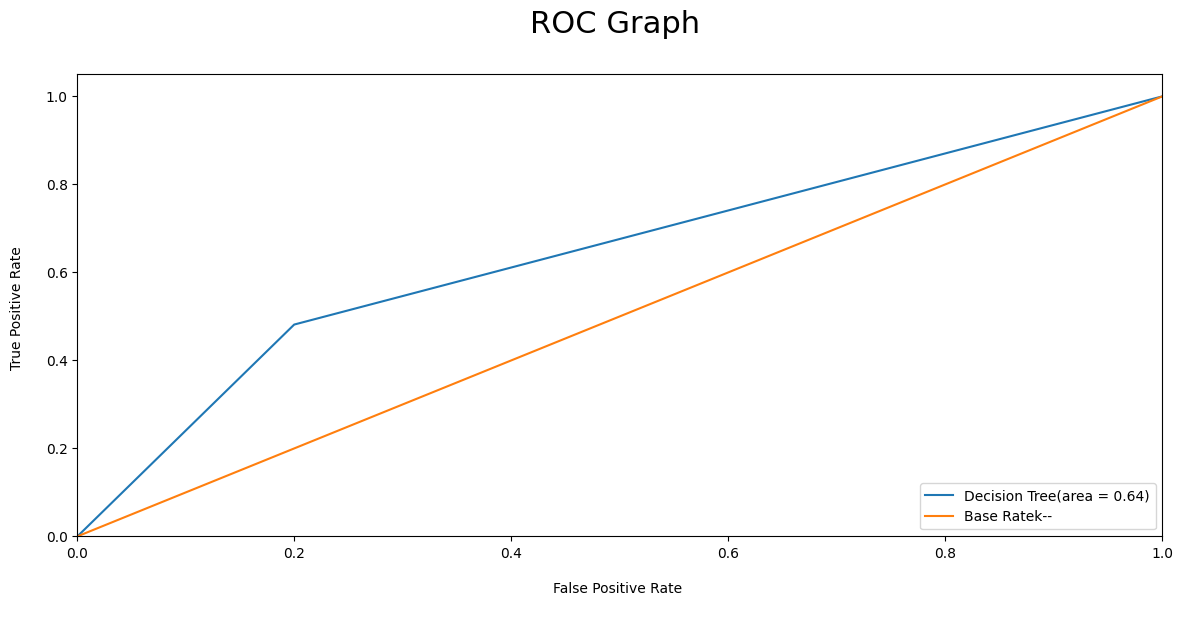

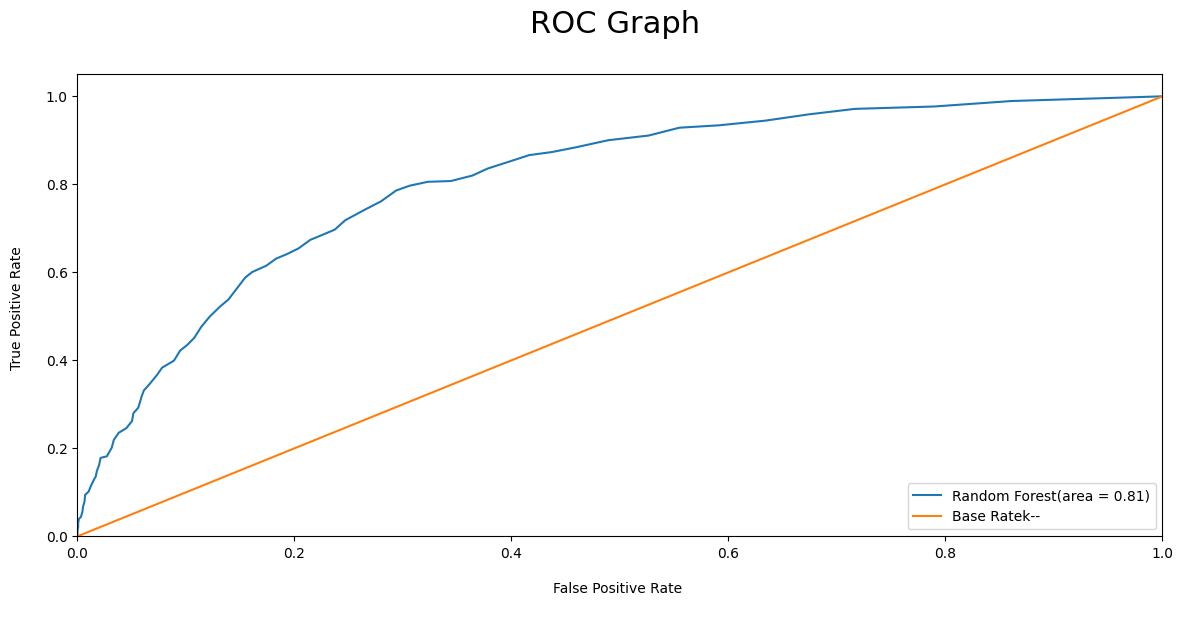

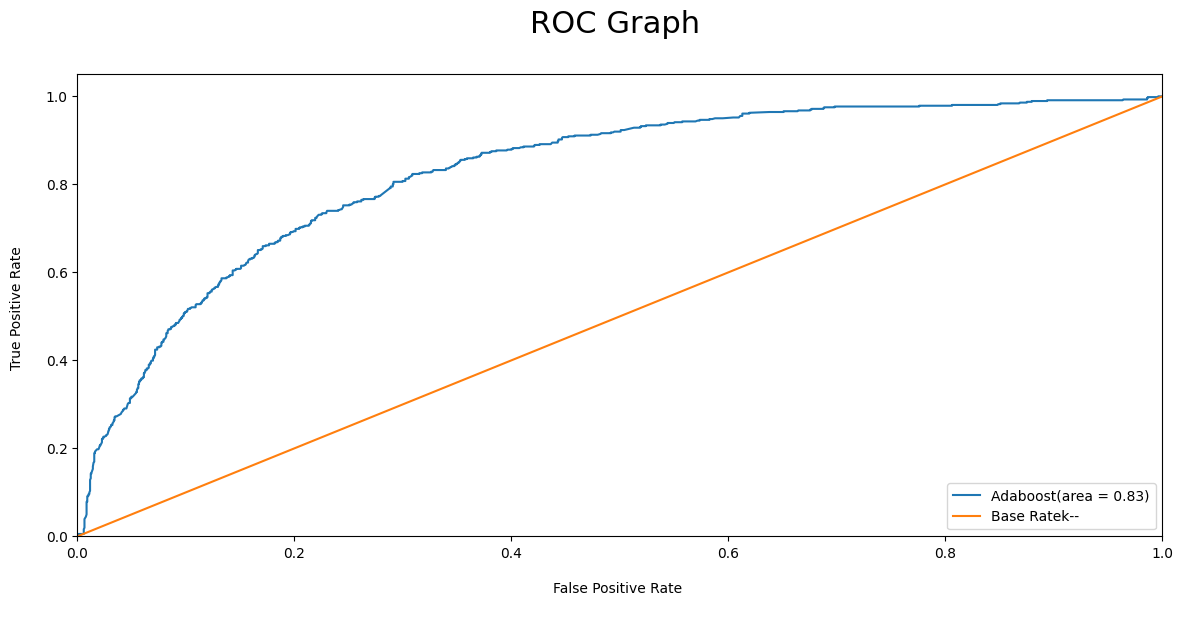

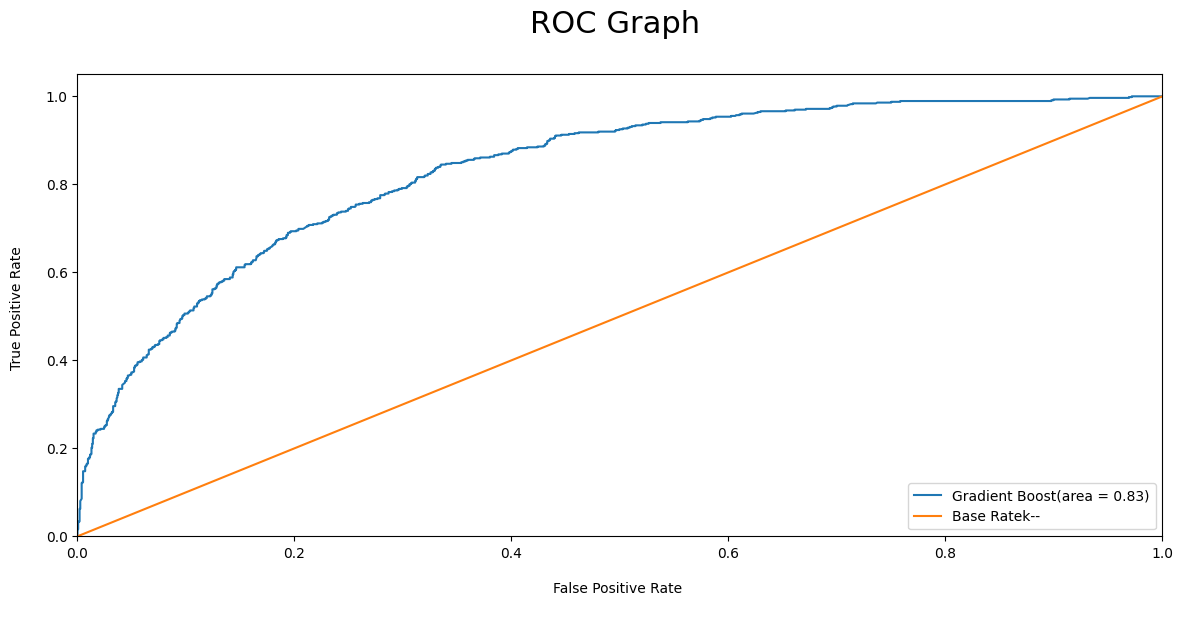

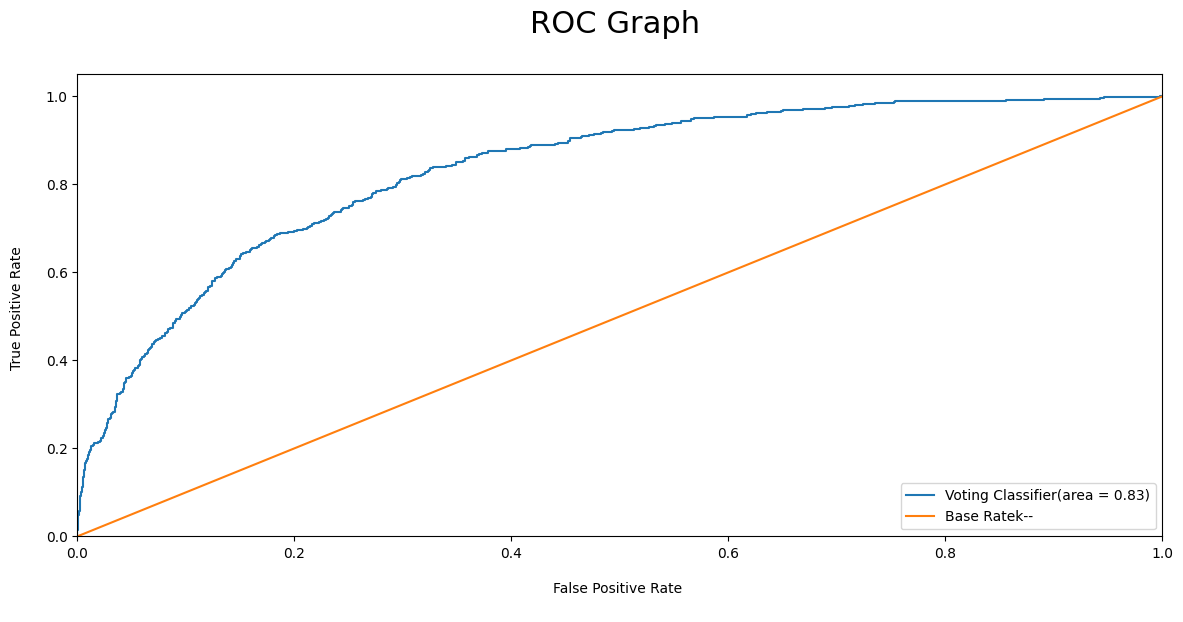

In [51]:
preds = [y_pred, y_pred3,  y_pred5, y_pred6, y_pred7,
              y_pred8, y_pred9, y_pred10]
classifiers = [classifier , classifier3, classifier5, classifier6, classifier7,
             classifier8, classifier9, classifier10]
model_names_ = ["Logistic Regression",  "K-Nearest Neighbours","Naive Bayes",
               "Decision Tree", "Random Forest", "Adaboost", "Gradient Boost",  "Voting Classifier"]

for i, j, k in zip(classifiers, model_names_, predictions):
    ROC_curve(i, j, k)

In [52]:
# Cross validation

from sklearn.model_selection import cross_val_score

# Function that will track the mean value and the standard deviation of the accuracy
def cvDictGen(functions, scr, X_train = X, y_train = y, cv = 5):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv = cv, scoring = scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]

    return cvDict

In [53]:
cvD = cvDictGen(classifiers, scr = 'roc_auc')
cvD

{'LogisticRegression': [0.8216558681916485, 0.009255961998661686],
 'KNeighborsClassifier': [0.747026134071079, 0.010207409479218197],
 'GaussianNB': [0.8097236989431466, 0.012893739336057926],
 'DecisionTreeClassifier': [0.6408617989163069, 0.016616480511433464],
 'RandomForestClassifier': [0.8089066115903023, 0.008759510109787783],
 'AdaBoostClassifier': [0.8322772016299466, 0.0149350081237096],
 'GradientBoostingClassifier': [0.8368019980282163, 0.011108060420887373],
 'VotingClassifier': [0.8344980826082097, 0.01096741970852053]}

# Predict Importan Feature

In [54]:
# Gradient Boost
feature_importances = pd.concat([pd.DataFrame(data.columns, columns = ["features"]),
                                 pd.DataFrame(np.transpose(classifier9.feature_importances_), columns = ["coef"])],axis = 1)
feature_importances.sort_values(by = "coef", ascending = False)

,features,coef
0,Unnamed: 0,0.339956
3,Location,0.231244
2,Tenure_Months,0.133486
10,Use_MyApp,0.094357
9,Video_Product,0.079394
6,Music_Product,0.039910
11,Payment_Method,0.034921
4,Device_Class,0.022352
5,Games_Product,0.018251
7,Education_Product,0.003190


In [55]:
# Ada boost classifier
feature_importances = pd.concat([pd.DataFrame(data.columns, columns = ["features"]),
                                 pd.DataFrame(np.transpose(classifier8.feature_importances_), columns = ["coef"])],axis = 1)
feature_importances.sort_values(by = "coef", ascending = False)

,features,coef
0,Unnamed: 0,0.28
11,Payment_Method,0.26
10,Use_MyApp,0.24
3,Location,0.06
9,Video_Product,0.04
2,Tenure_Months,0.02
4,Device_Class,0.02
5,Games_Product,0.02
6,Music_Product,0.02
7,Education_Product,0.02


#Hyper Parameter Tuning

## Using Randomized Search CV

In [56]:
#Ada boost

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
adaHyperParams = {'n_estimators': [10,50,100,200,420], "learning_rate":  [0.001, 0.01, 0.1, 0.3]}
gridSearchAda = RandomizedSearchCV(estimator = classifier8, param_distributions = adaHyperParams, n_iter = 5,
                                   scoring = 'roc_auc') # other option accuracy
gridSearchAda.fit(X_train, y_train)

RandomizedSearchCV(estimator=AdaBoostClassifier(), n_iter=5,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          0.3],
                                        'n_estimators': [10, 50, 100, 200,
                                                         420]},
                   scoring='roc_auc')

In [57]:
gridSearchAda.best_params_, gridSearchAda.best_score_

({'n_estimators': 420, 'learning_rate': 0.1}, 0.8359190066628883)

In [58]:
bestAdaModFitted = gridSearchAda.best_estimator_.fit(X_train, y_train)

In [59]:
# Getting the score AdaBoost
test_labels = bestAdaModFitted.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average = 'macro', sample_weight = None)

0.8327872034474519

# Gradient Boost

In [60]:
gbHyperParams = {'loss' : ['deviance', 'exponential'],
                 'n_estimators': randint(10, 500),
                 'max_depth': randint(1,10)}
# Initialization
gridSearchGB = RandomizedSearchCV(estimator = classifier9, param_distributions = gbHyperParams, n_iter = 10,
                                   scoring = 'roc_auc')
# Fitting the model
gridSearchGB.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                   param_distributions={'loss': ['deviance', 'exponential'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b012a492bc0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b012a7df520>},
                   scoring='roc_auc')

In [61]:
gridSearchGB.best_params_, gridSearchGB.best_score_

({'loss': 'exponential', 'max_depth': 2, 'n_estimators': 50},
 0.8379864091932671)

In [62]:
bestGBModFitted = gridSearchGB.best_estimator_.fit(X_train, y_train)

In [63]:
# Getting the score AdaBoost
test_labels_GB = bestGBModFitted.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels_GB , average = 'macro', sample_weight = None)

0.8346639147692816

## Grid search CV

In [64]:
ABC = AdaBoostClassifier()

ABC_param_grid = {"n_estimators" :[10,50,100,200,420],
                  "learning_rate":  [0.001, 0.01, 0.1, 0.3]}

gsABC = GridSearchCV(ABC, param_grid = ABC_param_grid, cv = 10, scoring = "roc_auc", n_jobs = 6, verbose = 1)

gsABC.fit(X_train,y_train)

ada_best = gsABC.best_estimator_
print(ada_best)
print(gsABC.best_score_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)
0.8372378664898823


In [65]:
bestAdaModFitted2 = gsABC.best_estimator_.fit(X_train, y_train)

In [66]:
test_labels = bestAdaModFitted2.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average = 'macro', sample_weight = None)

0.8353806025690502

#Gradient Boost

In [67]:
gb_param_grid = {'loss' : ['deviance'],
                 'n_estimators': [10,100,200,300],
                 'max_depth': [1,2,4,6,8]}

gsGB = GridSearchCV(classifier9, param_grid = gb_param_grid, cv = 10, scoring = "roc_auc", n_jobs = 6, verbose = 1)

gsGB.fit(X_train,y_train)

gb_best = gsGB.best_estimator_
print(gb_best)
print(gsGB.best_score_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
GradientBoostingClassifier(loss='deviance', max_depth=1)
0.8370594915594168


In [68]:
bestGBModFitted2 = gsGB.best_estimator_.fit(X_train, y_train)

test_labels_gb2 = bestGBModFitted2.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels_gb2 , average = 'macro', sample_weight = None)

0.8340798831247589